מגישות:לירון אוחנה, מעין אלקרייף וטובי סגל

https://www.kaggle.com/andrewmvd/okcupid-profiles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import collections as c
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
%matplotlib inline

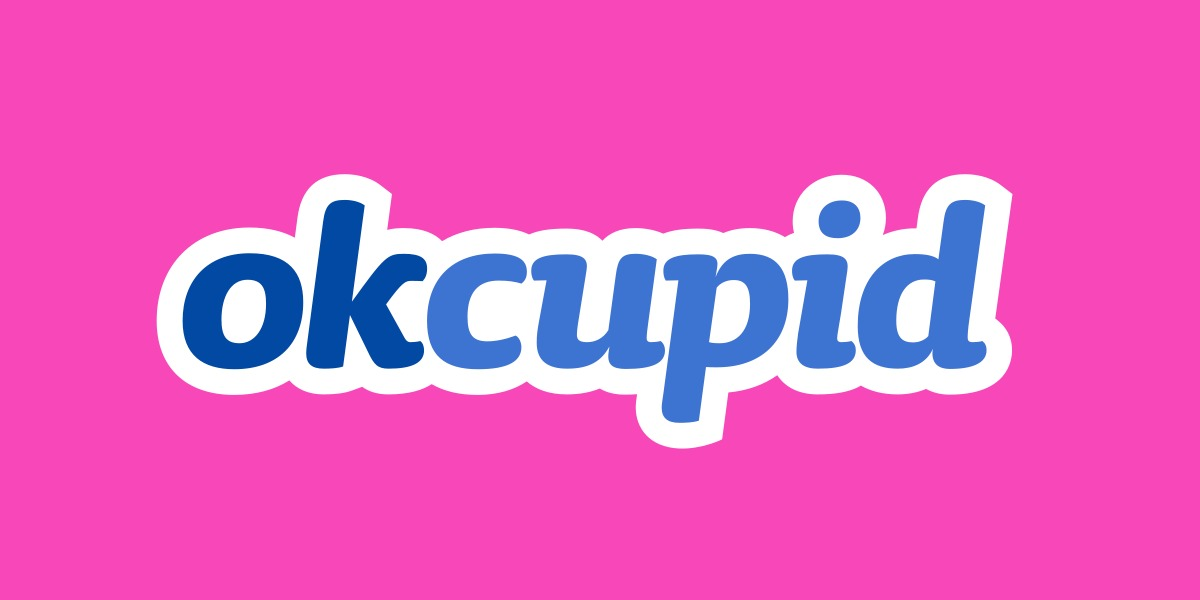

In [2]:
url= "https://raw.githubusercontent.com/LironOhana/Final_Project/main/okcupid_profiles546546.csv"
okcupid_df = pd.read_csv(url) 
okcupid_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [3]:
okcupid_df.isnull().sum()

age               0
status            0
sex               0
orientation       0
body_type       934
diet           4112
drinks          548
drugs          2491
education      1159
ethnicity      1038
height            0
income            0
job            1468
last_online       0
location          0
offspring      6176
pets           3434
religion       3569
sign           1903
smokes         1000
speaks            7
essay0          937
essay1         1273
essay2         1605
essay3         1991
essay4         1783
essay5         1850
essay6         2376
essay7         2149
essay8         3437
essay9         2150
dtype: int64

כיוון שאנו חוקרות כל עמודות בנפרד בשלב זה לא נטפל בערכים החסרים

ועבור כל תובנה נטפל בעמודות הרלוונטיות

In [4]:
okcupid_df.columns = okcupid_df.columns.str.replace(' ', '')

<AxesSubplot:>

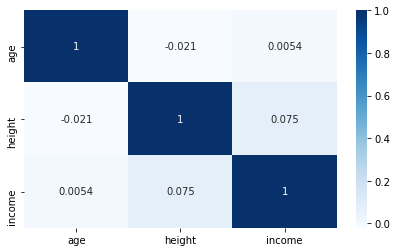

In [5]:
plt.figure(figsize=(7,4)) 
sns.heatmap(okcupid_df.corr(),annot=True,cmap='Blues')

ניסינו לבדוק האם קיימת קורולציה בין העמודות השונות בקובץ, לאחד בדיקה - גילינו כי הקשר מאד חלש, וכמעט לא קיימת קורולציה, לכן התחלנו לחקור עמודות מסויימות ללא קשר לקורולציה.

# תובנה 1


In [6]:
edu_lst = ['dropped out of law school' , 'graduated from law school' , 'dropped out of ph.d program' , 'graduated from ph.d program']
new_edu = okcupid_df[okcupid_df.education.isin(edu_lst)]
# new_edu["drugs"] = new_edu.drugs.dropna()
new_edu.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
65,29,single,m,straight,fit,mostly vegetarian,socially,never,graduated from ph.d program,white,...,i really like meeting new people. small-world ...,"i'm a scientist of sorts, doing some interesti...","talking, if you get me on the right subject. e...",i am a coffee nerd. ojal que llueva caf! loc...,food: i'm not a strict vegetarian but i don't ...,"wikipedia coffee bread, bagels, and the other ...",i think last names are interesting. lately i'...,"baking challah, then usually out with friends....",i watch sytycd.,you want to - check out a food pop-up - introd...
73,31,single,f,straight,curvy,mostly anything,socially,never,graduated from law school,indian,...,i'm an easy-going person with a genuine apprec...,"writing, performing/composing music, watching ...","whistling, writing, doing three-point turns, c...","well, that depends more on you than on me. wha...",books - some recently appreciated ones are: is...,"water, dairy products, a sense of community, a...",ways to amuse myself and others.,"getting a fabulous dinner, chilling at a mello...",ask and i'll tell you pretty much anything.,- you are looking for a long-term relationship...
108,28,single,f,straight,NaN,NaN,socially,never,graduated from law school,pacific islander,...,i pride myself on having fun no matter where i...,i'm a practicing attorney who is trying to fin...,finding answers. baking! storytelling. cheerin...,my laugh...i'm pretty loud.,books: anything from really trashy chick lit t...,soap. brunch. my kindle. peanut butter. music....,planning my next trip to somewhere. whether it...,NaN,i'm terrified of dating websites.,you're looking for someone to laugh with.
114,36,seeing someone,m,straight,fit,strictly anything,often,sometimes,graduated from ph.d program,white,...,"a business owner, a backend/frontend developer...",recovering from one hell of a month in africa....,"- breaking things, then trying to fix them all...",i have on shoes.,"- if you like ""who's afraid of virginia wolf"",...",after spending 3 months with no couch ... i kn...,how to play the banjo better. how to blend bet...,i have a knack for watching an entire tv serie...,"tyler, the creator makes me wanna move.",can type a bit of english. and would like to m...
157,29,single,f,straight,average,vegetarian,socially,never,graduated from law school,white,...,i grew up on the east coast and moved to the b...,working at a non-profit that focuses on enviro...,scrabble the tuesday crossword in the nytimes ...,i'm not going to say it's my eyes; that sounds...,"books: east of eden, to kill a mockingbird, mo...",laughter,"politics, current events, how to get out of th...","dinner party with friends, out at bar with my ...","if i could date a fictional character, it'd be...",NaN


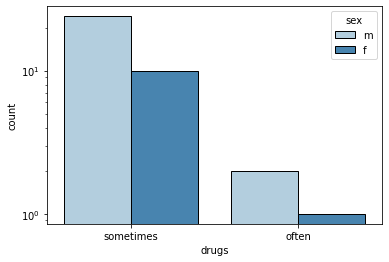

In [7]:
drug_without_never = new_edu[new_edu.drugs.isin(['sometimes' , 'often'])]
sns.countplot(x=drug_without_never['drugs'] , hue =drug_without_never['sex'] , edgecolor = 'black', palette='Blues').set_yscale("log")

ניתן לראות מהגרף הנ"ל שגברים שמעשנים סמים - יהוו יותר מהנשים באוכלוסיה

In [9]:
new_edu['drugs'] = new_edu['drugs'].astype('category').cat.codes
new_edu.head()

<ipython-input-9-308c270db196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_edu['drugs'] = new_edu['drugs'].astype('category').cat.codes


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
65,29,single,m,straight,fit,mostly vegetarian,socially,0,graduated from ph.d program,white,...,i really like meeting new people. small-world ...,"i'm a scientist of sorts, doing some interesti...","talking, if you get me on the right subject. e...",i am a coffee nerd. ojal que llueva caf! loc...,food: i'm not a strict vegetarian but i don't ...,"wikipedia coffee bread, bagels, and the other ...",i think last names are interesting. lately i'...,"baking challah, then usually out with friends....",i watch sytycd.,you want to - check out a food pop-up - introd...
73,31,single,f,straight,curvy,mostly anything,socially,0,graduated from law school,indian,...,i'm an easy-going person with a genuine apprec...,"writing, performing/composing music, watching ...","whistling, writing, doing three-point turns, c...","well, that depends more on you than on me. wha...",books - some recently appreciated ones are: is...,"water, dairy products, a sense of community, a...",ways to amuse myself and others.,"getting a fabulous dinner, chilling at a mello...",ask and i'll tell you pretty much anything.,- you are looking for a long-term relationship...
108,28,single,f,straight,NaN,NaN,socially,0,graduated from law school,pacific islander,...,i pride myself on having fun no matter where i...,i'm a practicing attorney who is trying to fin...,finding answers. baking! storytelling. cheerin...,my laugh...i'm pretty loud.,books: anything from really trashy chick lit t...,soap. brunch. my kindle. peanut butter. music....,planning my next trip to somewhere. whether it...,NaN,i'm terrified of dating websites.,you're looking for someone to laugh with.
114,36,seeing someone,m,straight,fit,strictly anything,often,2,graduated from ph.d program,white,...,"a business owner, a backend/frontend developer...",recovering from one hell of a month in africa....,"- breaking things, then trying to fix them all...",i have on shoes.,"- if you like ""who's afraid of virginia wolf"",...",after spending 3 months with no couch ... i kn...,how to play the banjo better. how to blend bet...,i have a knack for watching an entire tv serie...,"tyler, the creator makes me wanna move.",can type a bit of english. and would like to m...
157,29,single,f,straight,average,vegetarian,socially,0,graduated from law school,white,...,i grew up on the east coast and moved to the b...,working at a non-profit that focuses on enviro...,scrabble the tuesday crossword in the nytimes ...,i'm not going to say it's my eyes; that sounds...,"books: east of eden, to kill a mockingbird, mo...",laughter,"politics, current events, how to get out of th...","dinner party with friends, out at bar with my ...","if i could date a fictional character, it'd be...",NaN


The numbers of the drugs columns:
-1 - NaN ,
0 - never ,
1 - often ,
2 - sometimes

(array([0, 1, 2, 3]),
 [Text(0, 0, 'graduated from ph.d program'),
  Text(1, 0, 'graduated from law school'),
  Text(2, 0, 'dropped out of ph.d program'),
  Text(3, 0, 'dropped out of law school')])

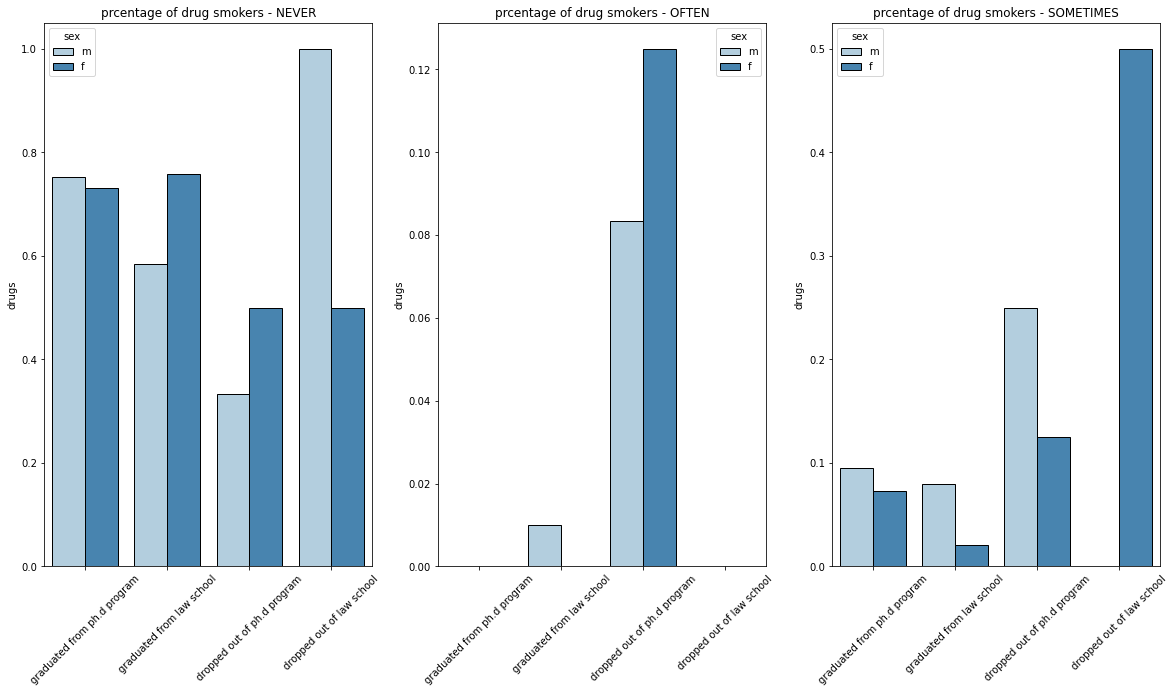

In [10]:
plt.figure(1,figsize=(20,10))
plt.subplot(1,3,1)

plt.title("prcentage of drug smokers - NEVER")
sns.barplot(x= new_edu["education"], y= new_edu["drugs"]==0 ,hue = new_edu['sex'] , ci = None , edgecolor = 'black', palette='Blues')#.set_yscale("log")
plt.xlabel("")
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.title("prcentage of drug smokers - OFTEN")
sns.barplot(x= new_edu["education"], y= new_edu["drugs"]==1 ,hue = new_edu['sex'] , ci = None , edgecolor = 'black', palette='Blues')#.set_yscale("log")
plt.xlabel("")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.title("prcentage of drug smokers - SOMETIMES")
sns.barplot(x= new_edu["education"], y= new_edu["drugs"]==2 ,hue = new_edu['sex'] , ci = None , edgecolor = 'black', palette='Blues')#.set_yscale("log")
plt.xlabel("")
plt.xticks(rotation=45)

#plt.show()

בגרפים הנ"ל ניתן לראות את החתך של ארבע קבוצות מאוכלוסיית החינוך, ביחס לשימוש בסמים (כל הנתונים באחוזים)

## מסקנה

גברים שנשרו מלימודי עריכת דין בחיים לא ניסו סמים.

# תובנה 2

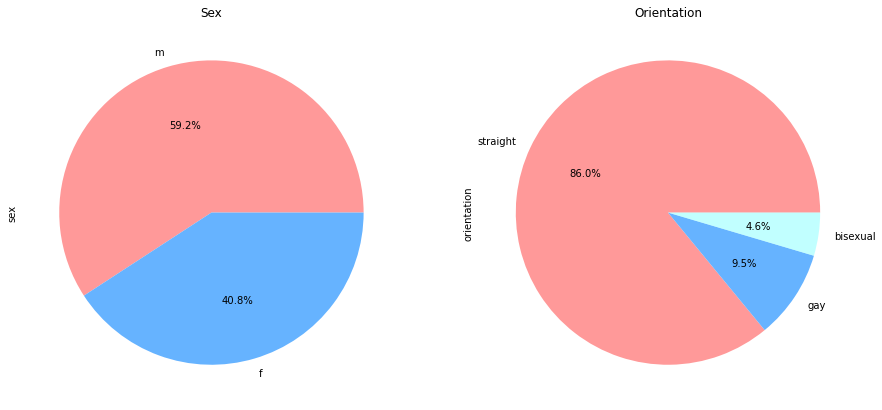

In [11]:
plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Sex")
colors = ['#ff9999','#66b3ff','#99ffff99','#ffcc99']
sex_data = okcupid_df["sex"].value_counts().plot.pie(autopct="%1.1f%%" , colors = colors)
plt.subplot(1,2,2)
plt.title("Orientation")
colors = ['#ff9999','#66b3ff','#99ffff99','#ffcc99']
sex_data = okcupid_df["orientation"].value_counts().plot.pie(autopct="%1.1f%%", colors = colors)


התפלגויות הגברים והנשים, והנטייה המינית בקובץ.

In [12]:
okcupid_df3 = okcupid_df.copy()
okcupid_df3["income"]=okcupid_df3["income"].fillna(0).copy()
okcupid_df3.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


בעמודת ההכנסה טיפלנו בערכים החסרים בעזרת החלפתם לספרה אפס  

In [13]:
ori_count = okcupid_df3.groupby('orientation').count()['age']
ori_count

orientation
bisexual     476
gay          984
straight    8937
Name: age, dtype: int64

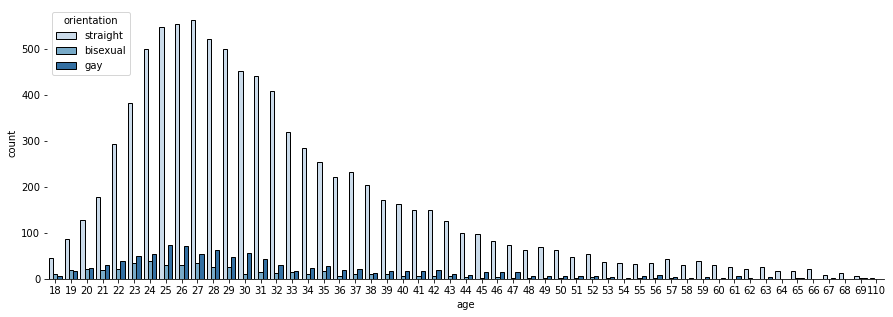

In [14]:
plt.rcParams["figure.figsize"] = (15,5)
sns.countplot(x ="age", hue = 'orientation', data = okcupid_df3,edgecolor = 'black', palette='Blues')
sns.despine(left=True)

כיוון שהתפלגות הגילאים וההכנסות מאוד גדולה, יצרנו חתכי גילאים והכנסות כדי שנוכל לחקור יותר טוב.

In [15]:
okcupid_df3['ori_percentage']=0

In [16]:
okcupid_df3.loc[okcupid_df3['orientation']=='straight','ori_percentage']=1/ori_count.straight
okcupid_df3.loc[okcupid_df3['orientation']=='gay','ori_percentage']=1/ori_count.gay
okcupid_df3.loc[okcupid_df3['orientation']=='bisexual','ori_percentage']=1/ori_count.bisexual

In [17]:
income_groups = pd.cut(okcupid_df3["income"], bins = [20000, 50000, 80000, 110000, 140000, np.inf])
age_groups18_30 = pd.cut(okcupid_df3["age"], bins = [18, 30])
df_18_30 = okcupid_df3.groupby([age_groups18_30,income_groups,'orientation'])[['ori_percentage']].sum()
df_18_30 = df_18_30.rename(columns = {"orientation" : "ori_percentage"})
df_18_30 = pd.DataFrame(df_18_30.to_records())

In [18]:
age_groups30_40 = pd.cut(okcupid_df3["age"], bins = [30, 40])
df_30_40 = okcupid_df3.groupby([age_groups30_40,income_groups,'orientation'])[['ori_percentage']].sum()
df_30_40 = df_30_40.rename(columns = {"orientation" : "ori_percentage"})
df_30_40 = pd.DataFrame(df_30_40.to_records())

In [19]:
age_groups40_50 = pd.cut(okcupid_df["age"], bins = [40, 50])
df_40_50 = okcupid_df3.groupby([age_groups40_50,income_groups,'orientation'])[['ori_percentage']].sum()
df_40_50 = df_40_50.rename(columns = {"orientation" : "ori_percentage"})
df_40_50 = pd.DataFrame(df_40_50.to_records())

In [20]:
age_groups50_60 = pd.cut(okcupid_df["age"], bins = [50, 60])
df_50_60 = okcupid_df3.groupby([age_groups50_60,income_groups,'orientation'])[['ori_percentage']].sum()
df_50_60 = df_50_60.rename(columns = {"orientation" : "ori_percentage"})
df_50_60 = pd.DataFrame(df_50_60.to_records())

In [21]:
age_groups60_inf = pd.cut(okcupid_df["age"], bins = [60, np.inf])
df_60_inf = okcupid_df3.groupby([age_groups60_inf,income_groups,'orientation'])[['ori_percentage']].sum()
df_60_inf = df_60_inf.rename(columns = {"orientation" : "ori_percentage"})
df_60_inf = pd.DataFrame(df_60_inf.to_records())

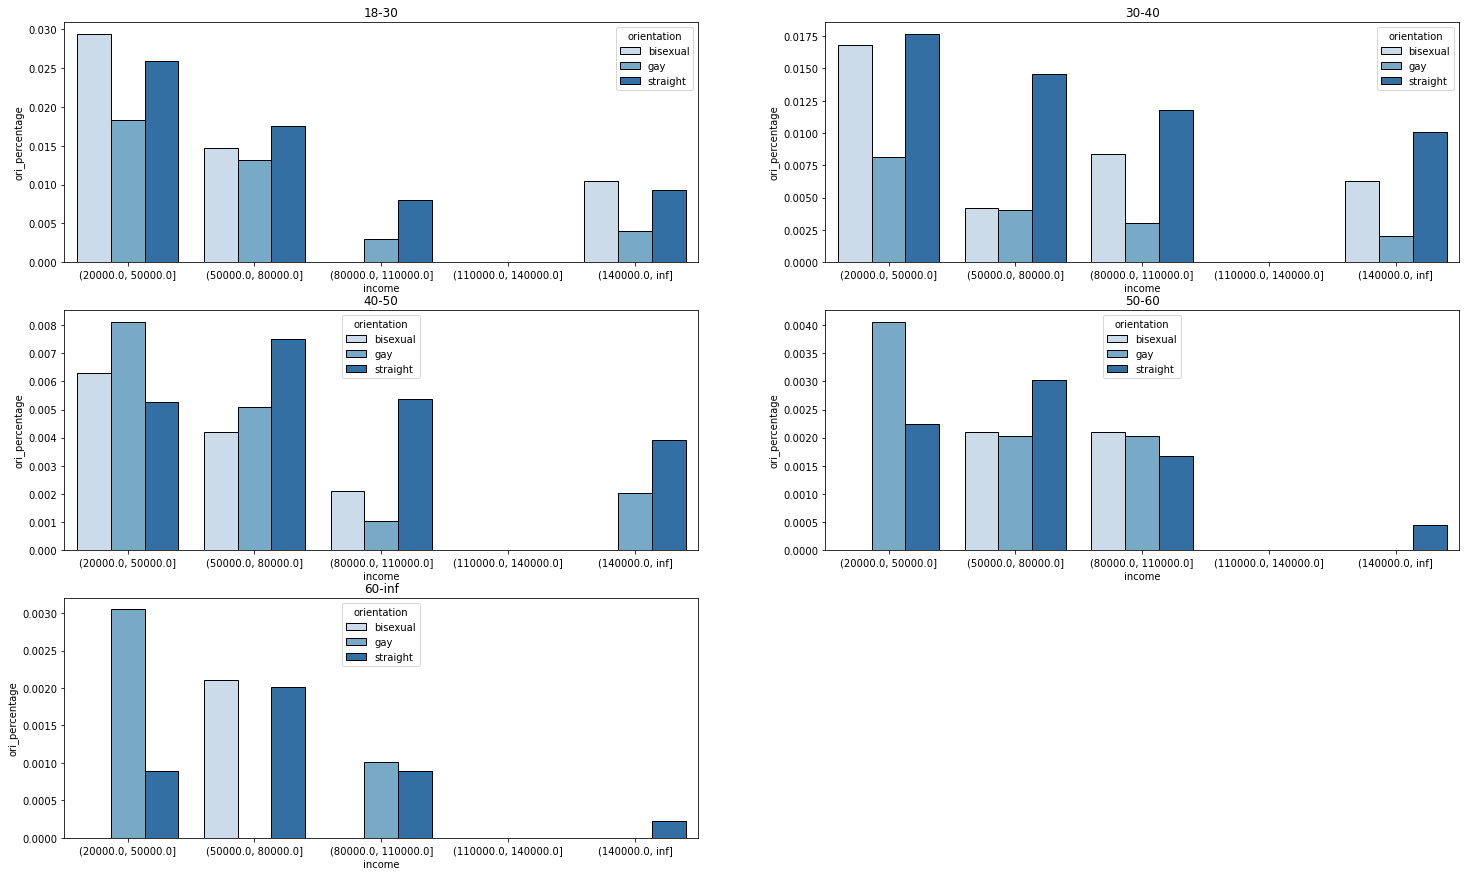

In [22]:
plt.figure(1,figsize=(25,15))

# fig, axes = plt.subplots(3,2,figsize=(22,10))
plt.subplot(3,2,1)
plt.title("18-30")
sns.barplot(x = df_18_30["income"], y = df_18_30["ori_percentage"], hue=(df_18_30["orientation"]),edgecolor = 'black', palette='Blues' ,ci=None)#.set_yscale("log")

plt.subplot(3,2,2)
plt.title("30-40")
sns.barplot(x = df_30_40["income"], y = df_30_40["ori_percentage"], hue=(df_30_40["orientation"]),edgecolor = 'black', palette='Blues' ,ci=None)#.set_yscale("log")

plt.subplot(3,2,3)
plt.title("40-50")
sns.barplot(x = df_40_50["income"], y = df_40_50["ori_percentage"], hue=(df_40_50["orientation"]),edgecolor = 'black', palette='Blues', ci=None)#.set_yscale("log")

plt.subplot(3,2,4)
plt.title("50-60")
sns.barplot(x = df_50_60["income"], y = df_50_60["ori_percentage"], hue=(df_50_60["orientation"]),edgecolor = 'black', palette='Blues', ci=None)#.set_yscale("log")

plt.subplot(3,2,5)
plt.title("60-inf")
sns.barplot(x = df_60_inf["income"], y = df_60_inf["ori_percentage"], hue=(df_60_inf["orientation"]),edgecolor = 'black', palette='Blues', ci=None)#.set_yscale("log")

plt.show()

## מסקנה

ניתן לראות מהגרפים שבטווח הגילאים 30-40 - סטרייטים מרוויחים יותר מהומואים ודו-מיניים בכל טווחי המשכורות.
בנוסף, ניתן לראות שאם מסתכלים בכל הגרפים על טווח המשכורות 20,000-50,000 - דווקא ההומואים והדו-מיניים מרוויחים יותר, (מלבד קבוצת הגילאים 30-40, בה יש פער קטן לטובת הסטרייטים).

# תובנה 3

In [23]:
okcupid_df4 = okcupid_df.copy()
columns=["body_type","essay0","essay3","essay9"]
okcupid_df4[columns]=okcupid_df4[columns].fillna("No info")
okcupid_df4.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,No info,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,No info
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,No info


תיקון הערכים החסרים לעמודות הספציפיות עליהן אני עובדת

רצינו לבדוק האם יש קשר בין נראות חיצונית לרמת הרצון והרצינות של כל משתמש למצוא אהבה אמיתית ע"פ הנתונים שכל אחד הזין על עצמו,
ניצור עמודה חדשה שבמה נאחד את כל העמודות בהם המשתמש מספר על עצמו לפי דרישות ההרשמה ואת עמודה זו נחקור 

נסדר את העמודות וניצור עמודה חדשה בה נספור כמה מילים כל משתמש כתב בתיאור על עצמו 

ואז נתמקד בעמודת מבנה הגוף

In [24]:
okcupid_df4["profile text"] = (okcupid_df4["essay0"].str.cat(okcupid_df4.iloc[:,22:-1].astype(str), sep=" "))
okcupid_df4["total words"]=okcupid_df4["profile text"].str.split().str.len()

In [25]:
df_num_word=(okcupid_df4.groupby(["body_type", "sex"])[["total words"]].count())
df_num_word = pd.DataFrame(df_num_word.to_records())
# df_num_word

Text(0.5, 1.0, 'Total Words')

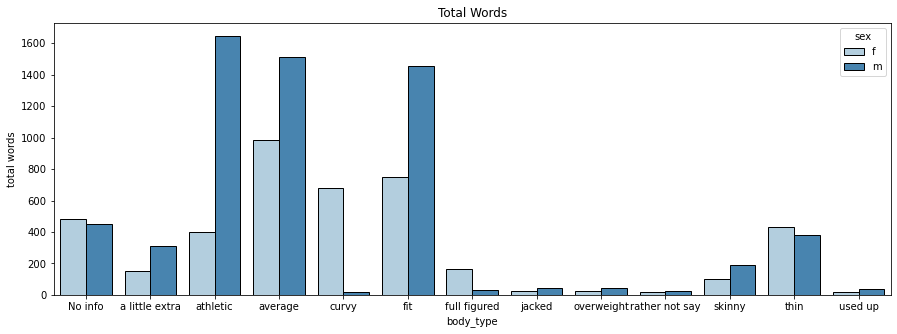

In [26]:
sns.barplot(x = df_num_word["body_type"], y=df_num_word["total words"], hue=df_num_word["sex"],edgecolor = 'black', palette='Blues' ,ci=None)
plt.title("Total Words")

בדיאגרה זו ניתן לראות כי ברוב סוגי מבנה הגוף הגברים פירטו הרבה יותר בשאלות הפתוחות

In [27]:
the_word_my=okcupid_df4[okcupid_df4["profile text"].str.contains("my")]

df_my=(the_word_my.groupby(["body_type", "sex"])[["sex"]].count())
df_my=df_my.rename(columns= {"sex":"count"})
df_my =pd.DataFrame(df_my.to_records())
# df_my

Text(0.5, 1.0, 'Count The Word "My"')

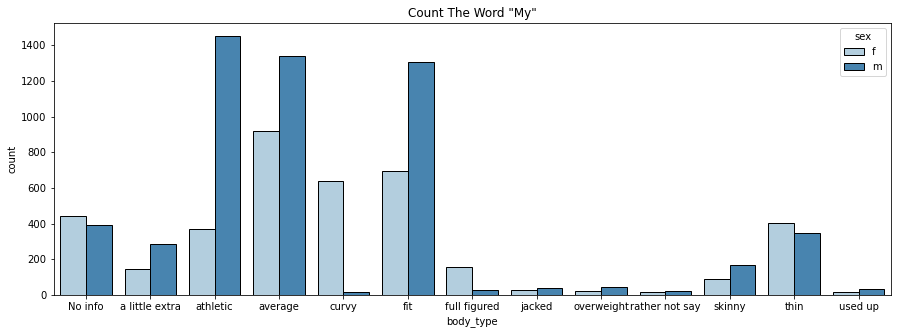

In [28]:
sns.barplot (x = df_my["body_type"], y=df_my["count"], hue=df_my["sex"],edgecolor = 'black', palette='Blues' ,ci=None)
plt.title('Count The Word "My"')

בדיאגרמה זו ניתן לראות כי גם פה הגברים מדברים הרבה יותר על עצמם מהנשים

In [29]:
love=okcupid_df[okcupid_df4["profile text"].str.contains("looking for love") | okcupid_df4["profile text"].str.contains("relationship") | okcupid_df4["profile text"].str.contains("serious")
        | okcupid_df4["profile text"].str.contains("marriage")
        | okcupid_df4["profile text"].str.contains("ready")
        | okcupid_df4["profile text"].str.contains("long term")
        | okcupid_df4["profile text"].str.contains("romantic")
        | okcupid_df4["profile text"].str.contains("romance")
        | okcupid_df4["profile text"].str.contains("know you")
        | okcupid_df4["profile text"].str.contains("partner")
        | okcupid_df4["profile text"].str.contains("sex")==False]


df_l=love.groupby(["body_type","sex"])[['sex']].count()
# df_l=love[["body_type","sex"]]
df_l=df_l.rename(columns= {"sex":"count"})
df_l = pd.DataFrame(df_l.to_records())
# df_l

Text(0.5, 1.0, 'Looking For Serious Love')

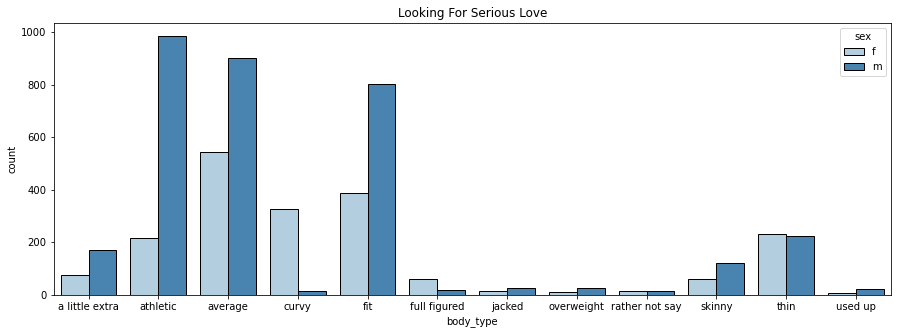

In [30]:
sns.barplot (x = df_l["body_type"], y=df_l["count"],edgecolor = 'black', palette='Blues' ,hue=df_l["sex"] ,ci=None)
plt.title("Looking For Serious Love")

## מסקנה

ניתן לראות שבכל הגברים שנראים יותר טוב מפרטים על עצמם יותר בפרופיל ונרשמו לאפליקציה כדי לחפש קשר רציני